# EDA, Preprocessing and Modeling

## Contents

* Introduction 
* Exploratory Data Analysis
    * Feature Definitions
    * Imports
    * Load the Data
    * Explore the Data
        * Summary statistics 
        * Distribution plots
        * Feature correlation heatmap
        * Most popular songs
        * Features over time
        * Plotting some columns of Dataset
        * Visualizing the basic statistics using boxplot
        * Most popular songs
        * Popular artists and Top 20 artists based on popularity score
* Training the data and Modeling
    * Training the data
        * Import
        * Splitting a data Train and Test
    * Modeling
        * Random Forest Model
            * Make a Pipeline
            * Using a  $𝑅^2$ , Mean Square Error to Assess model performance
            * Fit and assess performance using cross-validation
            * Hyperparameter search using GridSeaDrchCV
        * Gradentboosting Regressor
            * Define Model
            * Using a  𝑅2 , Mean Square Error to Assess model performance
        * Neural Network
            * Imports
            * Scale Data
            * Define Model
            * Compile 
      
* Summary
* Further scope
            
    
        

## Introduction

Music streaming services have become the most popular method for consumers to listen to music. With over 36% market share among online music subscribers and having a base of over 100 million subscribers, Spotify occupies the top spot. This project's goal is develop a model that predicts the popularity of the song.    

## Spotify Exploratory Data Analysis

   In this EDA, we will take a look at the features of the dataset, closer look at few of them in order to have a better understanding for the rest of the analysis. In order to access them a bit more practically, we need a definition of the features. Here are definition of features. 

### Feature Definitions
1. artists: The list of artists of the song
2. danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
3. duration_ms: The duration of the track in milliseconds
4. energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. (Float)
5. explicit: The content item is explicit and the user’s account is set to not play explicit content. Additional reasons may be added in the future. Note: If you use this field, make sure that your application safely handles unknown values.
6. instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
7. The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
8. liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
9. loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
10.  mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
11. name: Name of the song.
12. popularity: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.
13. release_date: The date the album was first released, for example “1981-12-15”. Depending on the precision, it might be shown as “1981” or “1981-12”.
14. speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
15. tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
16. valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
17. year: Year information extracted from release_date.

### Imports

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport


### Load the data

In [4]:
tracks = pd.read_csv('data_o.csv')

In [5]:
tracks.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [6]:
tracks['release_date'] = pd.to_datetime(tracks.release_date)
tracks['year'] = tracks.release_date.dt.year

In [7]:
tracks.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [8]:
tracks= tracks.dropna()

In [9]:
tracks = tracks[~tracks.duplicated()==1]

In [10]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   valence           170653 non-null  float64       
 1   year              170653 non-null  int64         
 2   acousticness      170653 non-null  float64       
 3   artists           170653 non-null  object        
 4   danceability      170653 non-null  float64       
 5   duration_ms       170653 non-null  int64         
 6   energy            170653 non-null  float64       
 7   explicit          170653 non-null  int64         
 8   id                170653 non-null  object        
 9   instrumentalness  170653 non-null  float64       
 10  key               170653 non-null  int64         
 11  liveness          170653 non-null  float64       
 12  loudness          170653 non-null  float64       
 13  mode              170653 non-null  int64         
 14  name

#### Summary statistics

In [11]:
tracks.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [12]:
def get_stats(df):
    # print stats for various metrics
    print(f"There are {df.shape[0]} rows")
    print(f"There are {df['id'].unique().shape} unique songs")
    print(f"There are {df['artists'].unique().shape} unique artists")
    print(f"There are {df['popularity'].unique().shape} popularity scores")
    print(f"The mean popularity score is {df['popularity'].mean()}")
    print(f"There are {df[df['popularity'] > 55]['popularity'].count()} songs with a popularity score > 55")
    print(f"There are {df[df['popularity'] > 75]['popularity'].count()} songs with a popularity score > 75")
    print(f"Only {(df[df['popularity'] > 80]['popularity'].count() / df.shape[0])*100:.2f} % of songs have a popularity score > 80")


In [13]:
get_stats(tracks)

There are 170653 rows
There are (170653,) unique songs
There are (34088,) unique artists
There are (100,) popularity scores
The mean popularity score is 31.431794342906365
There are 24909 songs with a popularity score > 55
There are 1736 songs with a popularity score > 75
Only 0.32 % of songs have a popularity score > 80


### Correlations

Let's see the correlations between continous metrics

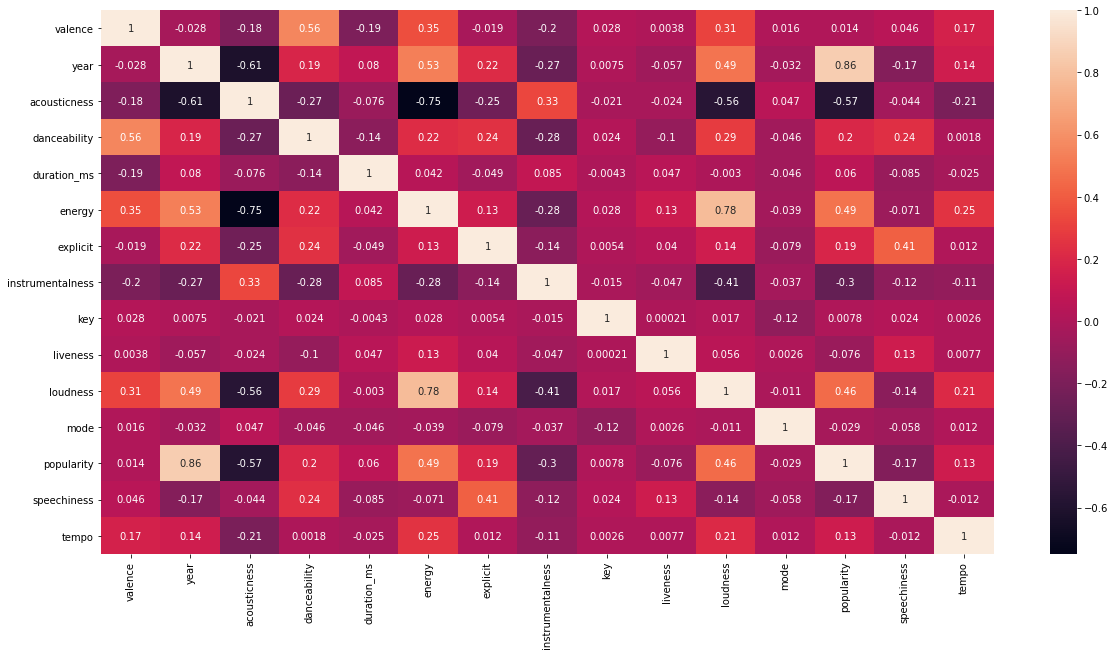

In [14]:
plt.figure(figsize=(20, 10))
sns.heatmap(tracks.corr(), annot=True)

From the heatmap, year, danceability, energy, loudness, and tempo are important features for predicting popularity. 

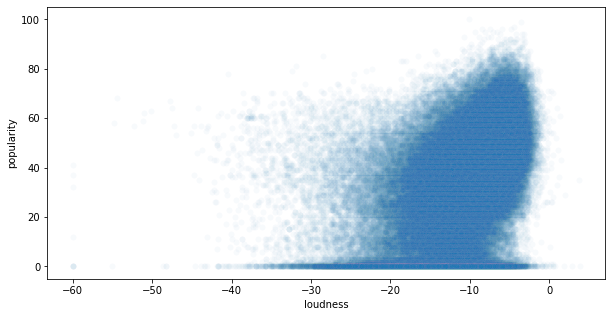

In [15]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'loudness', y = 'popularity', data = tracks, alpha = 0.03)


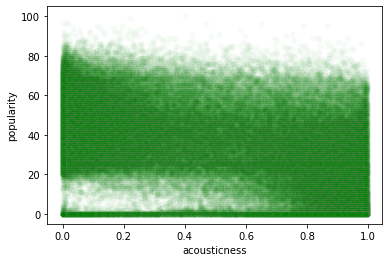

In [16]:
sns.scatterplot(x = 'acousticness', y = 'popularity', data = tracks, alpha = 0.03, color = 'green')

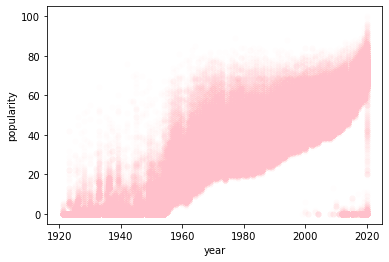

In [17]:
sns.scatterplot(x = 'year', y = 'popularity', data = tracks, alpha = 0.03, color = 'pink')

#### Distribution plots

(170653, 19)


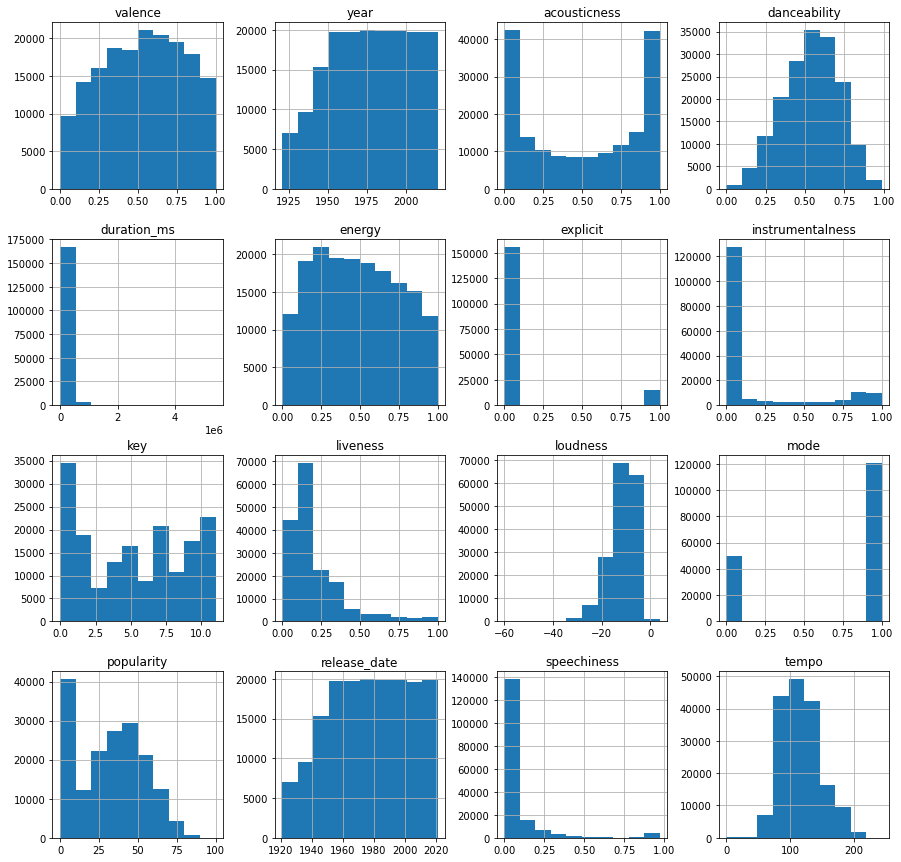

In [18]:
print(tracks.shape)
tracks.hist(figsize=(15, 15))
plt.show()

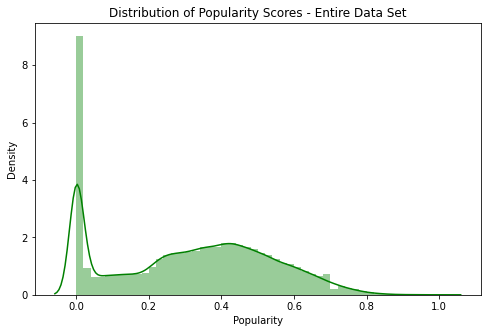

In [19]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
sns.distplot(tracks['popularity']/100, color='g', label="Popularity").set_title("Distribution of Popularity Scores - Entire Data Set")
plt.xlabel("Popularity")
plt.ylabel("Density")

plt.show()

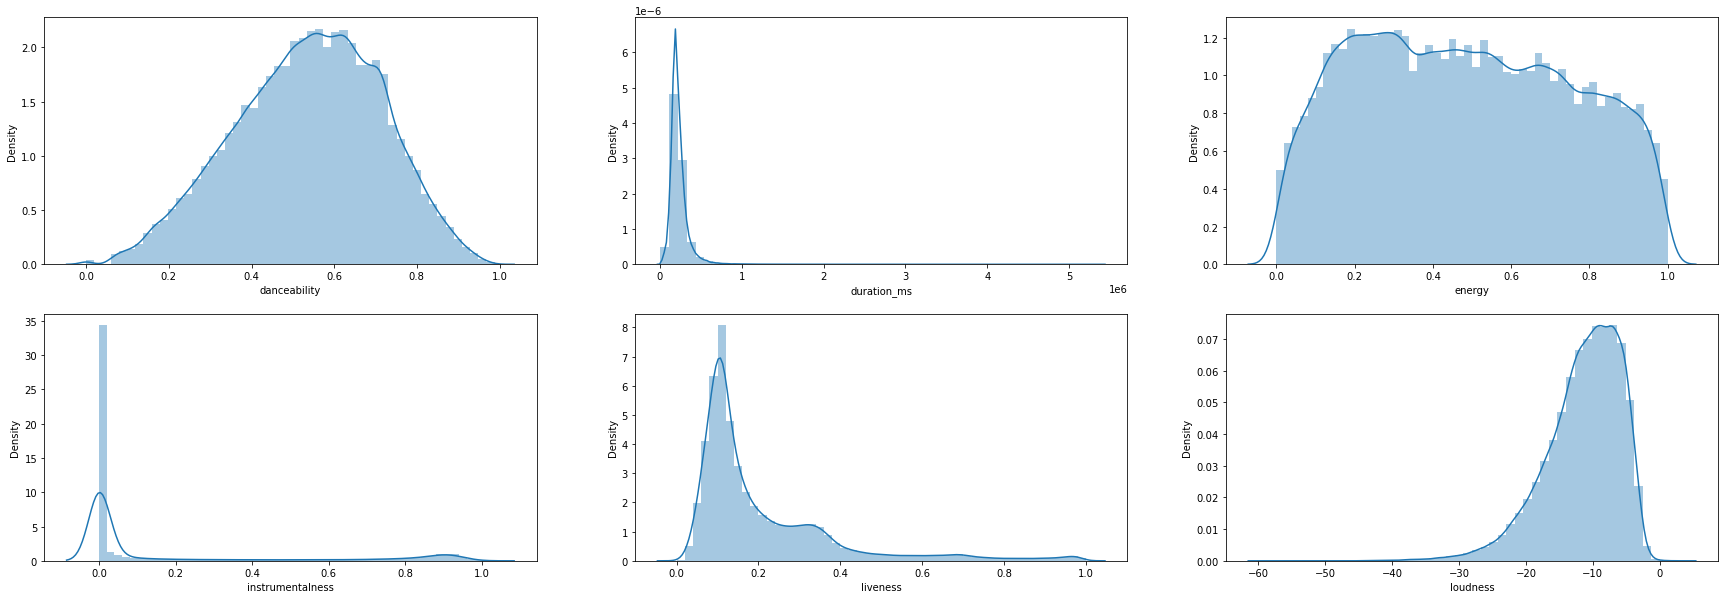

In [20]:
plt.figure(figsize = (30, 10))
plt.subplot(231)
sns.distplot(tracks['danceability'])
plt.subplot(232)
sns.distplot(tracks['duration_ms'])
plt.subplot(233)
sns.distplot(tracks['energy'])
plt.subplot(234)
sns.distplot(tracks['instrumentalness'])
plt.subplot(235)
sns.distplot(tracks['liveness'])
plt.subplot(236)
sns.distplot(tracks['loudness'])
plt.show()

From the distribution plots, most features are normally distributed with densities centered rather closely near the mean. 


#### Most popular songs

In [21]:
def most_popular_songs(df):
    most_popular = df[df['popularity'] > 90]['popularity'].count()
    print(df[df['popularity'] > 90][['name', 'popularity']])

In [22]:
most_popular_songs(tracks)

                                          name  popularity
19407                         Watermelon Sugar          94
19413                        Someone You Loved          91
19426                              Breaking Me          92
19606                   Mood (feat. iann dior)          99
19607  For The Night (feat. Lil Baby & DaBaby)          95
19608          WAP (feat. Megan Thee Stallion)          96
19609     Laugh Now Cry Later (feat. Lil Durk)          93
19610                                positions          96
19611                                   Dakiti         100
19612                  What You Know Bout Love          96
19613                                 Lemonade          94
19614                                    34+35          92
19615           Holy (feat. Chance The Rapper)          95
19616                          Blinding Lights          96
19618                                 Dynamite          97
19619                                  Heather          

#### Visualizing the basic statistics using boxplot

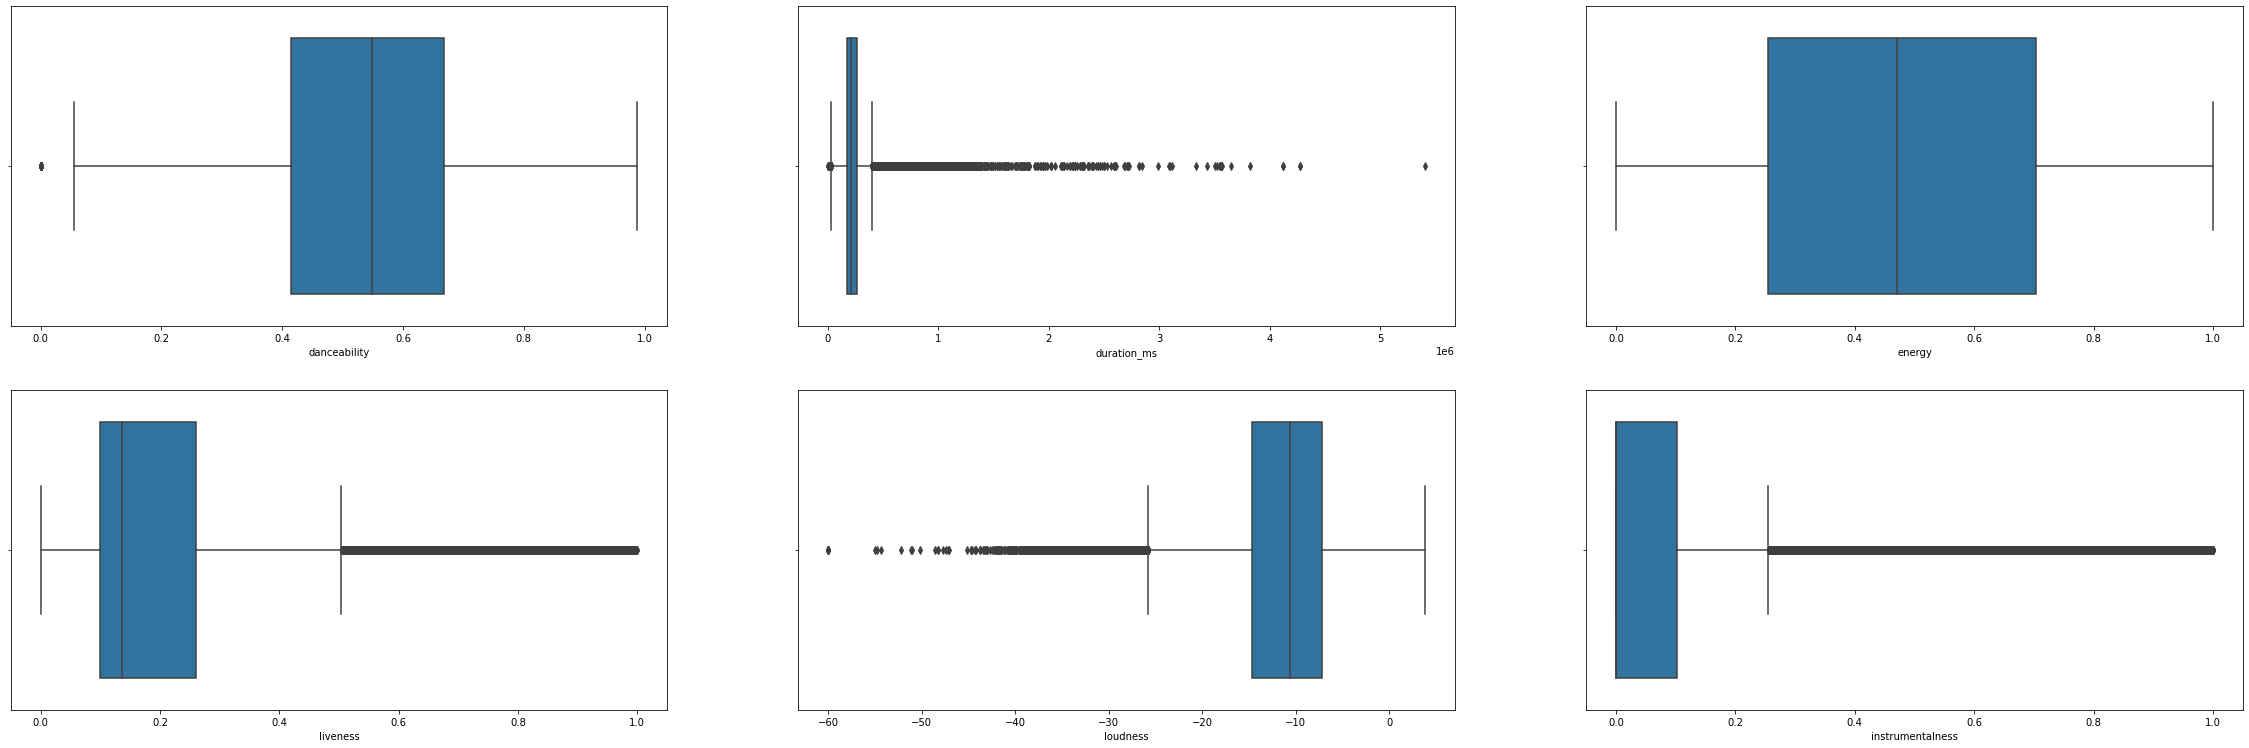

In [23]:
plt.figure(figsize = (40, 20))
plt.subplot(331)
sns.boxplot(tracks['danceability'])
plt.subplot(332)
sns.boxplot(tracks['duration_ms'])
plt.subplot(333)
sns.boxplot(tracks['energy'])
plt.subplot(334)
sns.boxplot(tracks['liveness'])
plt.subplot(335)
sns.boxplot(tracks['loudness'])
plt.subplot(336)
sns.boxplot(tracks['instrumentalness'])
plt.show()

#### Features over time

In [24]:
groups = tracks[tracks['year']>=1950].groupby(['year']).mean()

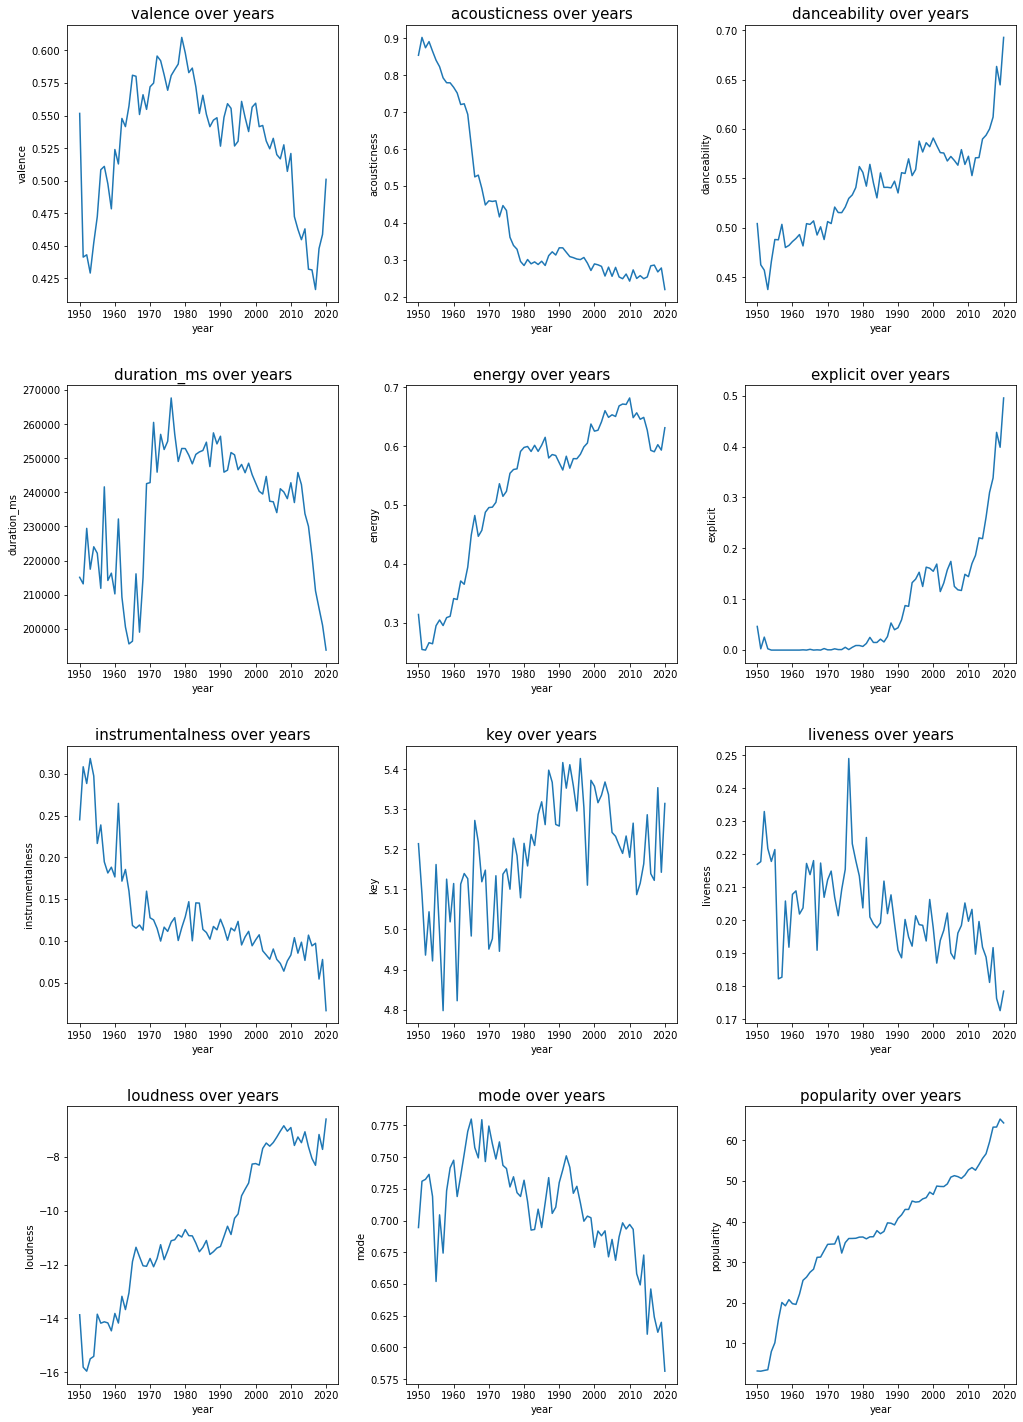

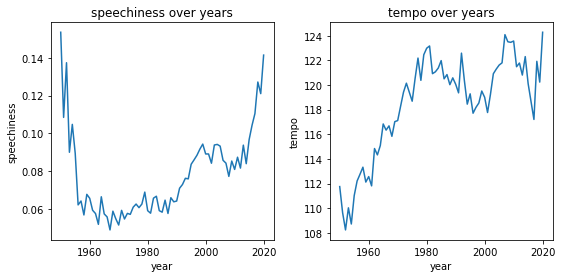

In [25]:
# features over the years
fig, axes1 = plt.subplots(4, 3, figsize=(17, 25))
plt.subplots_adjust(hspace=0.3, wspace=0.25)
fig, axes2 = plt.subplots(1, 2, figsize=(9, 4))
plt.subplots_adjust(wspace=0.25)

for row in axes1:
    for ax in row:
        col = groups.columns[list(axes1.flatten()).index(ax)]
        ax.plot(groups.index, groups[col])
        ax.set_title(col + ' over years', size=15)
        ax.set_xlabel('year')
        ax.set_ylabel(col)
        
for ax in axes2:
    col = groups.columns[list(axes2.flatten()).index(ax)+12]
    ax.plot(groups.index, groups[col])
    ax.set_title(col + ' over years', size=12)
    ax.set_xlabel('year')
    ax.set_ylabel(col)

plt.show()

#### Most popular songs

In [26]:
popularity= tracks.copy().sort_values(by=['popularity'],ascending=False)[['popularity','name','artists']][0:100]

In [27]:
popularity

,popularity,name,artists
19611,100,Dakiti,"['Bad Bunny', 'Jhay Cortez']"
19606,99,Mood (feat. iann dior),"['24kGoldn', 'iann dior']"
19618,97,Dynamite,['BTS']
19608,96,WAP (feat. Megan Thee Stallion),"['Cardi B', 'Megan Thee Stallion']"
19610,96,positions,['Ariana Grande']
...,...,...,...
19006,87,Jocelyn Flores,['XXXTENTACION']
19634,87,Be Like That - feat. Swae Lee & Khalid,"['Kane Brown', 'Swae Lee', 'Khalid']"
19650,87,The Woo (feat. 50 Cent & Roddy Ricch),"['Pop Smoke', '50 Cent', 'Roddy Ricch']"
19442,87,7 rings,['Ariana Grande']


In [28]:
tracks_popular = tracks[tracks.popularity > 90].sort_values(by = 'popularity', ascending = False)
tracks_popular.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
19611,0.145,2020,0.4010,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,Dakiti,100,2020-10-30,0.0544,109.928
19606,0.756,2020,0.2210,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),99,2020-07-24,0.0369,90.989
19618,0.737,2020,0.0112,['BTS'],0.746,199054,0.765,0,0t1kP63rueHleOhQkYSXFY,0.000000,6,0.0936,-4.410,0,Dynamite,97,2020-08-28,0.0993,114.044
19608,0.357,2020,0.0194,"['Cardi B', 'Megan Thee Stallion']",0.935,187541,0.454,1,4Oun2ylbjFKMPTiaSbbCih,0.000000,1,0.0824,-7.509,1,WAP (feat. Megan Thee Stallion),96,2020-08-07,0.3750,133.073
19610,0.682,2020,0.4680,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015


#### Popular artists and Top 20 artists based on popularity score

In [29]:
popular_artists = tracks.groupby("artists").agg({"popularity":np.mean}).sort_values(by= 'popularity', ascending=False).reset_index()

In [30]:
top20 = popular_artists.head(20)
top20

,artists,popularity
0,"['Bad Bunny', 'Jhay Cortez']",100.0
1,"['24kGoldn', 'iann dior']",99.0
2,"['Cardi B', 'Megan Thee Stallion']",96.0
3,"['Justin Bieber', 'benny blanco']",95.0
4,"['Joel Corry', 'MNEK']",94.0
5,"['Sech', 'Daddy Yankee', 'J Balvin', 'ROSALÍA'...",94.0
6,['Ritt Momney'],93.0
7,"['Drake', 'Lil Durk']",93.0
8,"['Lele Pons', 'Guaynaa']",92.0
9,"['Manuel Turizo', 'Rauw Alejandro', 'Myke Towe...",92.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

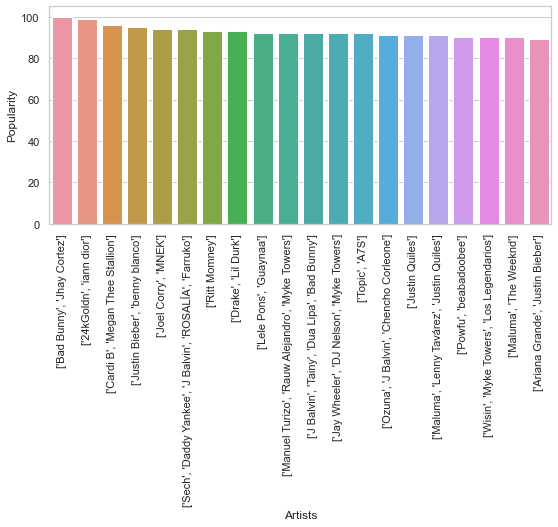

In [31]:
plt.figure(figsize=(9, 4))
sns.set(style="whitegrid")
ax = sns.barplot(x='artists', y = 'popularity', data = top20)
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

In [32]:
more_songs = tracks.artists.value_counts()
more_songs.head()

['Эрнест Хемингуэй']     1211
['Эрих Мария Ремарк']    1068
['Francisco Canaro']      942
['Frank Sinatra']         630
['Ignacio Corsini']       628
Name: artists, dtype: int64

## Preprocessing, Training and Modeling

### Imports

In [62]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### Splitting a data Train and Test 

In [ ]:
feature_names = list(tracks.columns.values)
feature_names.remove('popularity')
feature_names.remove('artists')
feature_names.remove('id')
feature_names.remove('name')
#feature_names.remove('year')
feature_names.remove('release_date')
X = tracks[feature_names]
y = tracks['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [63]:
def rmse(y_test,y_pred):
    return math.sqrt(mean_squared_error(y_test, y_pred))

### Linear Regression Model

In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
y_lr_pred = lr.predict(X_test)

In [58]:
r2_score(y_test, y_lr_pred)

0.7506048708235921

In [64]:
rmse(y_test, y_lr_pred)

10.899146189922394

### Decision Tree Model

In [65]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [67]:
y_dt_pred = dt.predict(X_test)

In [68]:
r2_score(y_test, y_dt_pred)

0.6103416975613839

In [69]:
rmse(y_test, y_dt_pred)

13.623555373124963

### Random Forest Model

#### Making a Pipeline

In [33]:
pipe15 = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state = 42)
)

In [34]:
pipe15.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

#### Using a $R^2$, Mean Square Error to Assess model performance

In [35]:
y_te_pred = pipe15.predict(X_test)

In [36]:
r2_score(y_test, y_te_pred)

0.8048574599263784

In [37]:
mean_absolute_error(y_test, y_te_pred)

6.757907592353597

In [38]:
def rf_cv(X, y, **kwargs):
    estimator = RandomForestRegressor(**kwargs)
    cval = cross_val_score(estimator, X, y, scoring = 'neg_mean_squared_error', cv = 4, verbose = 2, n_jobs = -1)
    return cval.mean()

In [39]:
def bayesian_optimise_rf(X, y, n_iter = 100):
    def rf_crossval(n_estimators, max_features):
        
        return rf_cv(
            X = X,
            y = y,
                n_estimators = int(n_estimators),
                max_features = max(min(max_features, 0.999), 1e-3),
            bootstrap = True
        )
    
    optimizer = BayesianOptimization(
        f = rf_crossval,
        pbounds = {
            "n_estimators" : (10, 400),
            "max_features" : (0.1, 0.999),
        }
    )
    optimizer.maximize(n_iter = n_iter)
    print("Final result:", optimizer.max)

In [40]:
bayesian_optimise_rf(X_train, y_train, n_iter = 100)

|   iter    |  target   | max_fe... | n_esti... |
-------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  6.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  6.6min finished


|  1        | -90.9     |  0.6425   |  322.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.0min finished


|  2        | -91.41    |  0.9104   |  269.1    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  3        | -91.53    |  0.8283   |  159.6    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.2min finished
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.2min remaining:    0.0s


|  4        | -90.77    |  0.3649   |  325.4    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.3min finished
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.3min remaining:    0.0s


|  5        | -108.3    |  0.1065   |  327.3    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   42.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   42.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  6        | -95.76    |  0.9835   |  22.99    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  6.9min finished
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  6.9min remaining:    0.0s


|  7        | -91.0     |  0.6925   |  322.1    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.9min finished


|  8        | -91.18    |  0.8323   |  324.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  6.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  6.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  9        | -91.15    |  0.7395   |  271.2    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  10       | -90.77    |  0.5368   |  273.4    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  6.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  6.4min finished


|  11       | -91.06    |  0.721    |  275.4    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.6min finished


|  12       | -90.93    |  0.3871   |  277.5    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  6.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  6.0min finished


|  13       | -91.06    |  0.7186   |  279.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.7min finished


|  14       | -91.2     |  0.295    |  281.7    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  15       | -91.38    |  0.9239   |  283.9    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.5min finished


|  16       | -95.61    |  0.1799   |  286.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.6min finished


|  17       | -91.24    |  0.6453   |  161.8    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  18       | -96.19    |  0.1684   |  163.9    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.4min finished


|  19       | -108.0    |  0.115    |  267.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  20       | -92.59    |  0.2159   |  157.7    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.9min finished


|  21       | -108.1    |  0.1      |  320.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  22       | -91.55    |  0.8684   |  155.5    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  23       | -91.16    |  0.3672   |  153.6    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  24       | -91.84    |  0.9654   |  151.9    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   34.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   34.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  25       | -108.5    |  0.1      |  149.9    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   56.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   56.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  26       | -91.72    |  0.4232   |  82.3     |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  27       | -91.93    |  0.7365   |  80.39    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  28       | -92.37    |  0.999    |  84.23    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   26.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   26.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  29       | -96.78    |  0.1641   |  78.39    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   37.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   37.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  30       | -93.15    |  0.2531   |  86.2     |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  31       | -91.56    |  0.4587   |  88.72    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  32       | -92.23    |  0.8966   |  90.51    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   30.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   30.3s finished


|  33       | -96.51    |  0.1689   |  92.56    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  34       | -95.74    |  0.1816   |  270.2    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.2min finished


|  35       | -108.3    |  0.1175   |  272.4    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  8.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  8.0min finished


|  36       | -91.37    |  0.8778   |  324.8    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  5.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  5.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  37       | -90.98    |  0.6673   |  274.2    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  5.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  5.1min finished


|  38       | -90.89    |  0.6942   |  278.5    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.2min finished


|  39       | -90.75    |  0.5535   |  282.8    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  40       | -95.37    |  0.1626   |  276.4    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  41       | -91.52    |  0.3354   |  160.8    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  6.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  6.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  42       | -91.3     |  0.8935   |  280.7    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  43       | -91.47    |  0.3494   |  154.6    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  44       | -91.87    |  0.7921   |  87.45    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.2min finished


|  45       | -92.52    |  0.2658   |  156.5    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.0min finished


|  46       | -108.2    |  0.1147   |  323.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  47       | -91.61    |  0.9557   |  282.1    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.7min finished


|  48       | -90.96    |  0.4743   |  209.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   55.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   55.0s finished


|  49       | -96.1     |  0.1843   |  152.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


|  50       | -108.8    |  0.126    |  280.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   36.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   36.2s finished


|  51       | -108.8    |  0.1427   |  148.9    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.3min finished


|  52       | -108.8    |  0.13     |  283.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.5min finished


|  53       | -91.73    |  0.8724   |  142.9    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.1min finished


|  54       | -92.14    |  0.2842   |  282.4    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   39.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   39.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  55       | -92.34    |  0.3943   |  59.51    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.6min finished


|  56       | -90.79    |  0.5447   |  308.7    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.1min remaining:    0.0s


|  57       | -92.13    |  0.2623   |  279.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  58       | -91.54    |  0.9828   |  281.4    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.4min finished


|  59       | -91.45    |  0.3456   |  154.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.7min finished


|  60       | -95.56    |  0.1911   |  274.8    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.6min finished


|  61       | -91.97    |  0.7292   |  81.39    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.2min finished


|  62       | -91.86    |  0.9608   |  154.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  8.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  8.1min finished


|  63       | -91.53    |  0.9516   |  307.9    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  9.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  9.2min finished


|  64       | -91.44    |  0.9309   |  346.5    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.1min finished


|  65       | -95.6     |  0.1512   |  307.7    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  8.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  8.2min finished


|  66       | -91.5     |  0.9371   |  309.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.5min finished


|  67       | -108.6    |  0.1      |  309.5    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.1min finished


|  68       | -95.57    |  0.1798   |  324.7    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  8.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  8.0min finished


|  69       | -91.46    |  0.9944   |  308.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.1min finished


|  70       | -91.83    |  0.9958   |  161.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  71       | -91.59    |  0.988    |  277.7    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.6min finished


|  72       | -91.28    |  0.3692   |  153.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   49.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   49.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  73       | -92.07    |  0.2971   |  89.69    |


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.7min finished


|  74       | -91.16    |  0.3138   |  338.1    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.3min finished


|  75       | -91.06    |  0.3879   |  210.4    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   37.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   37.3s finished


|  76       | -108.7    |  0.1045   |  159.9    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   40.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   40.1s finished


|  77       | -92.81    |  0.5266   |  46.2     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  8.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  8.5min finished


|  78       | -91.56    |  0.9406   |  325.8    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.2min finished


|  79       | -92.47    |  0.2228   |  161.5    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.8min finished


|  80       | -91.6     |  0.8994   |  158.9    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  5.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  5.3min finished


|  81       | -91.69    |  0.9965   |  210.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.3min finished


|  82       | -92.26    |  0.9916   |  89.26    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   21.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   21.4s finished


|  83       | -109.4    |  0.1136   |  87.96    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.6min finished


|  84       | -91.59    |  0.6064   |  97.8     |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.0min finished


|  85       | -91.63    |  0.9847   |  273.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.2min finished


|  86       | -92.46    |  0.9557   |  86.79    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.7min finished


|  87       | -95.78    |  0.2053   |  278.1    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 459.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 459.9min finished


|  88       | -91.5     |  0.8771   |  211.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  9.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  9.3min finished


|  89       | -91.57    |  0.9641   |  277.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.1min finished


|  90       | -108.2    |  0.1012   |  211.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  8.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  8.3min finished


|  91       | -91.52    |  0.999    |  279.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   37.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   37.4s finished


|  92       | -109.3    |  0.1356   |  155.7    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.1min finished


|  93       | -91.86    |  0.9831   |  155.0    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.8min finished


|  94       | -95.79    |  0.1549   |  273.8    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.0min finished


|  95       | -91.22    |  0.7119   |  157.2    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.2min finished


|  96       | -91.86    |  0.9914   |  158.1    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.2min finished


|  97       | -91.57    |  0.9946   |  274.7    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.8min finished


|  98       | -91.1     |  0.8479   |  338.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  9.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  9.4min finished


|  99       | -91.52    |  0.9882   |  337.8    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.2min finished


|  100      | -95.54    |  0.1596   |  338.9    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.5min finished


|  101      | -91.07    |  0.3431   |  337.4    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  9.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  9.1min finished


|  102      | -91.53    |  0.9936   |  336.9    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  2.7min finished


|  103      | -92.12    |  0.2518   |  336.6    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   31.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   31.7s finished


|  104      | -96.47    |  0.1577   |  80.91    |


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


|  105      | -91.84    |  0.9641   |  156.6    |
Final result: {'target': -90.75311374101841, 'params': {'max_features': 0.5534929674768578, 'n_estimators': 282.8172236307229}}


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  4.1min finished


In [60]:
from sklearn.model_selection import cross_validate, GridSearchCV, learning_curve

####  Fit and assess performance using cross-validation

In [41]:
from sklearn.model_selection import cross_validate, GridSearchCV, learning_curve

cv_results = cross_validate(pipe15, X_train, y_train, cv=5)
cv_scores = cv_results['test_score']
cv_scores


array([0.80482183, 0.79869933, 0.8058009 , 0.810553  , 0.80990704])

In [42]:
np.mean(cv_scores), np.std(cv_scores)

(0.805956418314009, 0.004259407834221302)

#### Hyperparameter search using GridSearchCV

In [20]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None]        
}

In [22]:
#rf_grid_cv = GridSearchCV(pipe15, param_grid=grid_params, cv=5, n_jobs=-1)
#rf_grid_cv.fit(X_train, y_train)

In [25]:
#rf_grid_cv.best_params_

In [26]:
#rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
#rf_best_scores = rf_best_cv_results['test_score']
#rf_best_scores

In [ ]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [ ]:
sns.regplot(y_test, y_pred)

In [35]:
from yellowbrick.model_selection import FeatureImportances


### GradientBoosting Regressor

#### Define Model

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=200,learning_rate=0.2,validation_fraction=0.1,n_iter_no_change=15)
gbr.fit(X_train,y_train)


GradientBoostingRegressor(learning_rate=0.2, n_estimators=200,
                          n_iter_no_change=15)

In [36]:
y_pred = gbr.predict(X_test)

#### Using a $R^2$, Mean Square Error to Assess model performance

In [37]:
print(mean_squared_error(y_test,y_pred))

95.02788499410322


In [38]:
r2_score(y_test, y_pred)

0.8004948665180881

#### Fitting for learning rate, max_depth, min_samples_leaf, max_features

In [39]:
param_grid = {'learning_rate': [0.1,0.01], 
              'max_depth': [4,8,12],
              'min_samples_leaf': [3,5,7],  
              'max_features': [0.3,0.6]}

In [40]:
gb_cv = GridSearchCV(gbr, param_grid, cv=3, n_jobs=-1)
gb_cv.fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [ ]:
gb_cv.best_estimator_

In [ ]:
bp = gb_cv.best_params_
print('Best Params: \n',bp)
print('Score: ',gb_cv.score(X_train, y_train))
print('MSE: ',mean_squared_error(y_train, gb_cv.predict(X_train)))
print('MAE: ',mean_absolute_error(y_train, gb_cv.predict(X_train)))

In [65]:
param_grid2 = {'learning_rate': [0.1,0.01,0.001]}
gb2 = GradientBoostingRegressor(n_estimators=1000, 
                                loss="huber", 
                                max_depth=bp['max_depth'],
                                max_features=bp['max_features'],
                                min_samples_leaf=bp['min_samples_leaf'])
gb2_cv = GridSearchCV(gb2,param_grid2,cv=5)
gb2_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(loss='huber', max_depth=8,
                                                 max_features=0.6,
                                                 min_samples_leaf=5,
                                                 n_estimators=1000),
             param_grid={'learning_rate': [0.1, 0.01, 0.001]})

In [66]:
gb2_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=8,
                          max_features=0.6, min_samples_leaf=5,
                          n_estimators=1000)

In [67]:
bp2 = gb2_cv.best_params_
print('Best Params: \n',bp2)
print('Score: ',gb2_cv.score(X_train, y_train))
print('MSE: ',mean_squared_error(y_train, gb2_cv.predict(X_train)))
print('MAE: ',mean_absolute_error(y_train, gb2_cv.predict(X_train)))

Best Params: 
 {'learning_rate': 0.01}
Score:  0.8296533139945539
MSE:  81.1532293326933
MAE:  6.08602214484125


In [68]:
feature_imp = gb2_cv.best_estimator_.feature_importances_
feature_imp

array([2.85282361e-03, 7.78616779e-01, 1.13171548e-01, 4.28685992e-03,
       1.00815874e-02, 3.56793588e-02, 3.98094197e-03, 8.47203457e-03,
       4.89491585e-04, 2.88094710e-03, 2.42338168e-02, 2.10766383e-04,
       1.23392409e-02, 2.70380446e-03])

In [73]:
seed = 7
models = []
models.append(('RFR', RandomForestRegressor(random_state = 42)))
models.append(('GBR', GradientBoostingRegressor(n_estimators=200,learning_rate=0.2,validation_fraction=0.1,n_iter_no_change=15)))
models.append(('LNR', LinearRegression()))
models.append(('DT', DecisionTreeRegressor(random_state=0)))
#models.append(('MLP', MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)))

results = []
names = []
scoring = 'neg_root_mean_squared_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RFR: -9.816639 (4.232202)
GBR: -9.661451 (4.411412)
LNR: -10.674564 (4.270654)
DT: -14.059695 (2.951767)


In [77]:
seed = 7
models = []
models.append(('RFR', RandomForestRegressor(random_state = 42)))
models.append(('GBR', GradientBoostingRegressor(n_estimators=200,learning_rate=0.2,validation_fraction=0.1,n_iter_no_change=15)))
models.append(('LNR', LinearRegression()))
models.append(('DT', DecisionTreeRegressor(random_state=0)))


results1 = []
names1 = []
scoring = 'r2'
for name1, model1 in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model1, X, y, cv=kfold, scoring=scoring)
    results1.append(cv_results)
    names1.append(name1)
    msg = "%s: %f (%f)" % (name1, cv_results.mean(), cv_results.std())
    print(msg)

RFR: 0.759303 (0.185768)
GBR: 0.764779 (0.192500)
LNR: 0.724298 (0.198817)
DT: 0.545460 (0.180838)


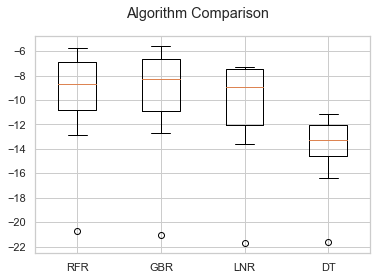

In [75]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

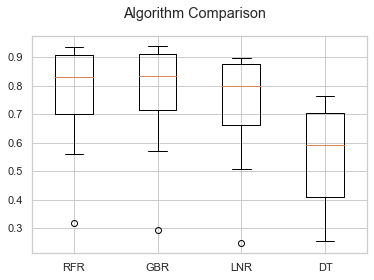

In [78]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names1)
plt.show()

From the above analysis GradientBoostingRegressor have the most reliable result. 

### Neural Network

#### Imports

In [69]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
print(tf.__version__)

2.4.1


#### Scale data

In [70]:
mm_scaler = MinMaxScaler()
X_train_sc = mm_scaler.fit_transform(X_train)
X_test_sc = mm_scaler.transform(X_test)
X_train_sc.shape

(136522, 14)

#### Define Model

In [71]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.Dropout(0.7),
                             tf.keras.layers.Dense(256, activation = 'relu'),
                             tf.keras.layers.Dropout(0.6),
                             tf.keras.layers.Dense(128,activation="relu"),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(64,activation="relu"),
                             tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(8, activation = 'relu'),
                             tf.keras.layers.Dense(1)
])

# Defining RMSE Metric
rmse = tf.keras.metrics.RootMeanSquaredError()

# Compiling our Model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[rmse])

In [73]:
model_fit = model.fit(x=X_train_sc,y=y_train,epochs=40, validation_data=(X_test_sc,y_test))

Epoch 1/40
4267/4267 [==============================] - 28s 6ms/step - loss: 120.5029 - root_mean_squared_error: 10.9774 - val_loss: 149.9852 - val_root_mean_squared_error: 12.2468
Epoch 2/40
4267/4267 [==============================] - 26s 6ms/step - loss: 120.5943 - root_mean_squared_error: 10.9815 - val_loss: 149.8932 - val_root_mean_squared_error: 12.2431
Epoch 3/40
4267/4267 [==============================] - 26s 6ms/step - loss: 119.1976 - root_mean_squared_error: 10.9178 - val_loss: 154.2993 - val_root_mean_squared_error: 12.4217
Epoch 4/40
4267/4267 [==============================] - 26s 6ms/step - loss: 118.8143 - root_mean_squared_error: 10.9002 - val_loss: 132.7579 - val_root_mean_squared_error: 11.5221
Epoch 5/40
4267/4267 [==============================] - 27s 6ms/step - loss: 119.0988 - root_mean_squared_error: 10.9132 - val_loss: 152.8544 - val_root_mean_squared_error: 12.3634
Epoch 6/40
4267/4267 [==============================] - 27s 6ms/step - loss: 118.9297 - root_me

In [74]:
y_pred = model.predict(X_test_sc)
print(float(rmse(y_test,y_pred)))

11.52888011932373


In [75]:
r2_score(y_test, y_pred)

0.7209531453376228

In [76]:
def nn_eval(dense1, Dropout1, dense2):
    params = [
                             tf.keras.layers.Dense(dense1,activation="relu"),
                             tf.keras.layers.Dropout(Dropout1),
                             tf.keras.layers.Dense(dense2,activation="relu"),
                             tf.keras.layers.Dense(1)
]
    model = tf.keras.Sequential(params)
    # Defining RMSE Metric
    rmse = tf.keras.metrics.RootMeanSquaredError()
    y_pred = model.predict(X_test_sc)
# Compiling our Model
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=[rmse])
    model_fit = model.fit(x=X_train_sc,y=y_train,epochs=40, validation_data=(X_test_sc,y_test))
    return -rmse(y_test,y_pred)

In [77]:
nnBO = BayesianOptimization(nn_eval, {
    'dense1': (64,512),
    'Dropout1': (0, 0.9),
    'dense2': (16, 128),
      
                                                })

nnBO.maximize(n_iter=10, init_points=2)

|   iter    |  target   | Dropout1  |  dense1   |  dense2   |
-------------------------------------------------------------
Epoch 1/40
4267/4267 [==============================] - 13s 3ms/step - loss: 221.8655 - root_mean_squared_error: 14.3065 - val_loss: 106.6008 - val_root_mean_squared_error: 10.3248
Epoch 2/40
4267/4267 [==============================] - 12s 3ms/step - loss: 109.6773 - root_mean_squared_error: 10.4723 - val_loss: 110.6690 - val_root_mean_squared_error: 10.5199
Epoch 3/40
4267/4267 [==============================] - 12s 3ms/step - loss: 109.0388 - root_mean_squared_error: 10.4417 - val_loss: 104.4903 - val_root_mean_squared_error: 10.2221
Epoch 4/40
4267/4267 [==============================] - 13s 3ms/step - loss: 107.5588 - root_mean_squared_error: 10.3708 - val_loss: 103.0648 - val_root_mean_squared_error: 10.1521
Epoch 5/40
4267/4267 [==============================] - 13s 3ms/step - loss: 107.8186 - root_mean_squared_error: 10.3830 - val_loss: 102.9044 - val_root

Epoch 10/40
4267/4267 [==============================] - 14s 3ms/step - loss: 103.5962 - root_mean_squared_error: 10.1779 - val_loss: 102.7182 - val_root_mean_squared_error: 10.1350
Epoch 11/40
4267/4267 [==============================] - 13s 3ms/step - loss: 104.7549 - root_mean_squared_error: 10.2346 - val_loss: 102.5138 - val_root_mean_squared_error: 10.1249
Epoch 12/40
4267/4267 [==============================] - 13s 3ms/step - loss: 101.6607 - root_mean_squared_error: 10.0823 - val_loss: 100.5597 - val_root_mean_squared_error: 10.0279
Epoch 13/40
4267/4267 [==============================] - 14s 3ms/step - loss: 104.0992 - root_mean_squared_error: 10.2027 - val_loss: 101.0216 - val_root_mean_squared_error: 10.0510
Epoch 14/40
4267/4267 [==============================] - 14s 3ms/step - loss: 103.1910 - root_mean_squared_error: 10.1582 - val_loss: 100.8764 - val_root_mean_squared_error: 10.0437
Epoch 15/40
4267/4267 [==============================] - 15s 3ms/step - loss: 103.2129 - r

Epoch 15/40
4267/4267 [==============================] - 15s 3ms/step - loss: 102.3287 - root_mean_squared_error: 10.1154 - val_loss: 100.8482 - val_root_mean_squared_error: 10.0423
Epoch 16/40
4267/4267 [==============================] - 15s 3ms/step - loss: 103.1345 - root_mean_squared_error: 10.1551 - val_loss: 100.4986 - val_root_mean_squared_error: 10.0249
Epoch 17/40
4267/4267 [==============================] - 14s 3ms/step - loss: 103.6535 - root_mean_squared_error: 10.1808 - val_loss: 99.7709 - val_root_mean_squared_error: 9.9885
Epoch 18/40
4267/4267 [==============================] - 15s 3ms/step - loss: 101.7097 - root_mean_squared_error: 10.0847 - val_loss: 100.0307 - val_root_mean_squared_error: 10.0015
Epoch 19/40
4267/4267 [==============================] - 15s 3ms/step - loss: 101.4908 - root_mean_squared_error: 10.0739 - val_loss: 100.6202 - val_root_mean_squared_error: 10.0310
Epoch 20/40
4267/4267 [==============================] - 14s 3ms/step - loss: 102.2368 - roo

Epoch 20/40
4267/4267 [==============================] - 14s 3ms/step - loss: 105.4252 - root_mean_squared_error: 10.2675 - val_loss: 102.7247 - val_root_mean_squared_error: 10.1353
Epoch 21/40
4267/4267 [==============================] - 14s 3ms/step - loss: 105.0336 - root_mean_squared_error: 10.2484 - val_loss: 102.0222 - val_root_mean_squared_error: 10.1006
Epoch 22/40
4267/4267 [==============================] - 14s 3ms/step - loss: 105.3032 - root_mean_squared_error: 10.2614 - val_loss: 100.7235 - val_root_mean_squared_error: 10.0361
Epoch 23/40
4267/4267 [==============================] - 14s 3ms/step - loss: 105.6561 - root_mean_squared_error: 10.2785 - val_loss: 101.9890 - val_root_mean_squared_error: 10.0990
Epoch 24/40
4267/4267 [==============================] - 14s 3ms/step - loss: 105.4076 - root_mean_squared_error: 10.2659 - val_loss: 100.9006 - val_root_mean_squared_error: 10.0449
Epoch 25/40
4267/4267 [==============================] - 14s 3ms/step - loss: 104.1661 - r

Epoch 25/40
4267/4267 [==============================] - 9s 2ms/step - loss: 99.4578 - root_mean_squared_error: 9.9726 - val_loss: 99.3487 - val_root_mean_squared_error: 9.9674
Epoch 26/40
4267/4267 [==============================] - 8s 2ms/step - loss: 100.4507 - root_mean_squared_error: 10.0219 - val_loss: 98.3058 - val_root_mean_squared_error: 9.9149
Epoch 27/40
4267/4267 [==============================] - 7s 2ms/step - loss: 100.2044 - root_mean_squared_error: 10.0098 - val_loss: 99.7556 - val_root_mean_squared_error: 9.9878
Epoch 28/40
4267/4267 [==============================] - 9s 2ms/step - loss: 100.1621 - root_mean_squared_error: 10.0078 - val_loss: 98.6064 - val_root_mean_squared_error: 9.9301
Epoch 29/40
4267/4267 [==============================] - 7s 2ms/step - loss: 99.7886 - root_mean_squared_error: 9.9882 - val_loss: 98.2148 - val_root_mean_squared_error: 9.9103
Epoch 30/40
4267/4267 [==============================] - 9s 2ms/step - loss: 98.3029 - root_mean_squared_erro

4267/4267 [==============================] - 7s 2ms/step - loss: 102.4064 - root_mean_squared_error: 10.1192 - val_loss: 99.3217 - val_root_mean_squared_error: 9.9660
Epoch 36/40
4267/4267 [==============================] - 6s 2ms/step - loss: 102.5761 - root_mean_squared_error: 10.1276 - val_loss: 99.1619 - val_root_mean_squared_error: 9.9580
Epoch 37/40
4267/4267 [==============================] - 6s 2ms/step - loss: 101.3841 - root_mean_squared_error: 10.0679 - val_loss: 99.6137 - val_root_mean_squared_error: 9.9807
Epoch 38/40
4267/4267 [==============================] - 6s 1ms/step - loss: 102.2605 - root_mean_squared_error: 10.1110 - val_loss: 99.8987 - val_root_mean_squared_error: 9.9949
Epoch 39/40
4267/4267 [==============================] - 7s 2ms/step - loss: 101.5850 - root_mean_squared_error: 10.0788 - val_loss: 99.2752 - val_root_mean_squared_error: 9.9637
Epoch 40/40
4267/4267 [==============================] - 7s 2ms/step - loss: 101.5463 - root_mean_squared_error: 10.0

Epoch 40/40
4267/4267 [==============================] - 6s 1ms/step - loss: 105.2252 - root_mean_squared_error: 10.2578 - val_loss: 101.8533 - val_root_mean_squared_error: 10.0922
|  9        | -27.76    |  0.7268   |  303.8    |  46.94    |
Epoch 1/40
4267/4267 [==============================] - 7s 2ms/step - loss: 226.3428 - root_mean_squared_error: 14.4571 - val_loss: 117.2732 - val_root_mean_squared_error: 10.8293
Epoch 2/40
4267/4267 [==============================] - 6s 1ms/step - loss: 114.3334 - root_mean_squared_error: 10.6920 - val_loss: 104.4787 - val_root_mean_squared_error: 10.2215
Epoch 3/40
4267/4267 [==============================] - 7s 2ms/step - loss: 112.1349 - root_mean_squared_error: 10.5890 - val_loss: 103.8999 - val_root_mean_squared_error: 10.1931
Epoch 4/40
4267/4267 [==============================] - 7s 2ms/step - loss: 111.3498 - root_mean_squared_error: 10.5516 - val_loss: 103.8309 - val_root_mean_squared_error: 10.1897
Epoch 5/40
4267/4267 [===============

4267/4267 [==============================] - 6s 2ms/step - loss: 100.8018 - root_mean_squared_error: 10.0391 - val_loss: 100.1192 - val_root_mean_squared_error: 10.0060
Epoch 10/40
4267/4267 [==============================] - 6s 2ms/step - loss: 99.5327 - root_mean_squared_error: 9.9763 - val_loss: 100.1674 - val_root_mean_squared_error: 10.0084
Epoch 11/40
4267/4267 [==============================] - 7s 2ms/step - loss: 100.6229 - root_mean_squared_error: 10.0309 - val_loss: 101.0985 - val_root_mean_squared_error: 10.0548
Epoch 12/40
4267/4267 [==============================] - 7s 2ms/step - loss: 100.6601 - root_mean_squared_error: 10.0327 - val_loss: 99.7730 - val_root_mean_squared_error: 9.9886
Epoch 13/40
4267/4267 [==============================] - 6s 1ms/step - loss: 99.7296 - root_mean_squared_error: 9.9858 - val_loss: 104.5419 - val_root_mean_squared_error: 10.2246
Epoch 14/40
4267/4267 [==============================] - 7s 2ms/step - loss: 99.0251 - root_mean_squared_error: 9

### Model Comparison

RFR: -114.277940 (111.966233)
GBR: -112.980505 (117.091823)


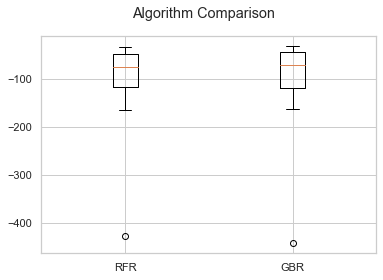

In [49]:
seed = 7
# prepare models
models = []
models.append(('RFR', RandomForestRegressor(random_state = 42)))
models.append(('GBR', GradientBoostingRegressor(n_estimators=200,learning_rate=0.2,validation_fraction=0.1,n_iter_no_change=15)))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Summary